In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
data = pd.read_csv("../data/sensordata.csv", sep=";", usecols=['Time.Date', 'Acc.Abs'])
data 

,Time.Date,Acc.Abs
0,210800.0,10.15695
1,210810.0,9.99079
2,210820.0,10.35707
3,210830.0,10.12535
4,210840.0,9.45583
...,...,...
9455,305350.0,8.11224
9456,305360.0,8.17075
9457,305370.0,8.18790
9458,305380.0,8.19446


In [3]:
def convert_to_float(x):
    try:
        return float(x.decode().replace(',', '.'))
    except ValueError:
        return value  # Return the value unchanged if conversion fails

In [4]:
data = np.genfromtxt("../data/sensordata.csv", delimiter=";", dtype=np.float64, usecols=(0,-1))
data = data[1:]
mean_value = np.mean(data[:,1])
data[:,1] = data[:,1] - mean_value

In [5]:
def plot(t, y_mes, y_pred, name): 
    plt.figure(figsize=(12, 3))
    plt.title(name)
    
    plt.plot(t, y_mes, 'b-', label="Measured")
    plt.plot(t, y_pred, 'r-', label="Predicted")
    plt.title(name)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

    plt.legend()
    plt.show()

In [6]:
def sinf(t, A, f, phi, D):
    return A * np.sin(2 * np.pi * f * t + phi) + D

t = data.T[0][0:1000]
y_mes = data.T[1][0:1000]

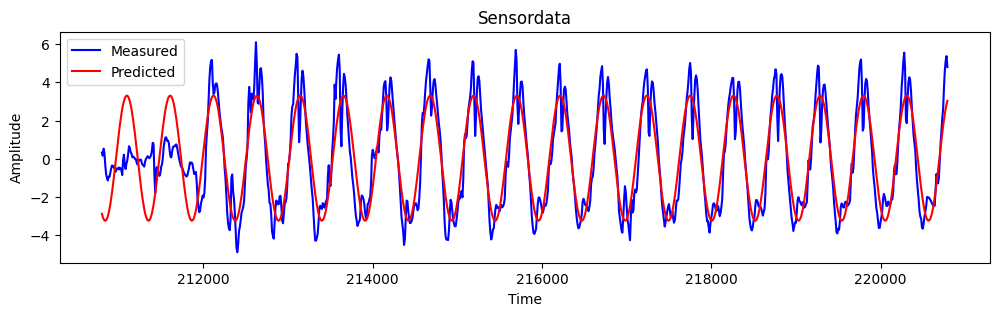

In [12]:
# Generate y values by applying the function to the x values
y_pred = sinf(t,-3.27708, 0.50195295, 3.0967114, 0.029759144)
plot(t, y_mes, y_pred, 'Sensordata')

## Also good results

In [8]:
y_pred = sinf(t, -3.2568235, -1.7980499, 0.70980597, 0.0274433) 
#plot(t, y_mes, y_pred, 'Sensordata')

In [9]:
y_pred = sinf(t, 3.2528174, 3.2019534, -6.9773836, -0.017225612)
#plot(t, y_mes, y_pred, 'Sensordata')

In [10]:
y_pred = sinf(t, 3.2332468, -1.2019573, 2.744975, 0.006796282)
#plot(t, y_mes, y_pred, 'Sensordata')